<h1>In this 2 hidden with first having 18 and second having 1 neuron </h1>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
!ls

2018_Analyze_This_Problem_Statement.docx  Be_Professional_IITRoorkee_6.csv
2018_Submission_deck.pptx		  Be_Professional_IITRoorkee_8.csv
Analyze_This1.ipynb			  Correlation checking.ipynb
Analyze_This2.ipynb			  Data_Dictionary.csv
Analyze_This3.ipynb			  Evaluation criteria.docx
Be_Professional_IITRoorkee_11.csv	  Evaluation_dataset.csv
Be_Professional_IITRoorkee_12.csv	  Guidelines_AnalyzeThis_2018.docx
Be_Professional_IITRoorkee_14.csv	  hackit
Be_Professional_IITRoorkee_15.csv	  Leaderboard_dataset.csv
Be_Professional_IITRoorkee_16.csv	  sample_submission.csv
Be_professional_IITRoorkee_24.csv	  Training_dataset_Original.csv


In [3]:
dataset = pd.read_csv('Training_dataset_Original.csv')
leaderboard_dataset = pd.read_csv('Leaderboard_dataset.csv')

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataset = dataset.iloc[:, 1:]  #Removing the ID column
leaderboard_dataset = leaderboard_dataset.iloc[:, 1:]

In [5]:
dataset.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset.iloc[:, -2] = labelencoder.fit_transform(dataset.iloc[:, -2])
leaderboard_dataset.iloc[:, -1] = labelencoder.transform(leaderboard_dataset.iloc[:, -1])

In [7]:
#I will remove the garbage values here
for i in range(0, len(dataset.columns)):
    dataset.iloc[:, i] = pd.to_numeric(dataset.iloc[:, i], errors='coerce')

for i in range(0, len(leaderboard_dataset.columns)):
    leaderboard_dataset.iloc[:, i] = pd.to_numeric(leaderboard_dataset.iloc[:, i], errors='coerce')

In [8]:
leaderboard_dataset

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.5001,0.000,0.0000,0.000,206.0,19179.0,206.0,14221.0,19438.0,...,1.0,0.0,NaN,20.551,0.42105,3.0,0.85661,NaN,0.0,1
1,1894.0,1.9701,0.000,0.0000,0.000,297.0,19820.0,19820.0,176895.0,66346.0,...,3.0,0.0,NaN,63.047,0.00000,15.0,0.94391,0.0,0.0,0
2,1774.0,0.1718,0.000,0.0000,0.000,197.0,2563.0,877.0,8869.0,3637.0,...,1.0,0.0,NaN,83.797,0.33333,3.0,0.76467,0.0,0.0,0
3,1586.0,0.1123,5.299,0.0000,0.000,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,1.50000,0.0,NaN,NaN,NaN,0
4,1832.0,1.4442,0.000,0.0000,0.000,179.0,7577.0,179.0,21059.0,20306.0,...,3.0,0.0,96.052,66.665,0.00000,23.0,0.79190,0.0,0.0,1
5,1838.0,0.0544,0.241,0.0000,0.000,882.0,14039.0,10976.0,278941.0,74030.0,...,4.0,0.0,NaN,77.780,0.00000,21.0,0.92462,0.0,0.0,1
6,1743.0,1.0753,0.272,0.0000,0.000,397.0,16141.0,3568.0,69482.0,56755.0,...,6.0,0.0,NaN,67.159,0.00000,14.0,0.71347,0.0,0.0,1
7,1935.0,0.5601,0.000,0.0000,0.000,496.0,44919.0,17115.0,124814.0,124167.0,...,9.0,0.0,NaN,NaN,0.00000,15.0,0.92403,0.0,0.0,1
8,1885.0,0.0811,0.000,0.0000,0.000,7369.0,19264.0,19264.0,59956.0,26633.0,...,1.0,0.0,NaN,NaN,0.00000,5.0,0.89760,0.0,NaN,1
9,1730.0,0.7444,0.000,0.0000,0.000,0.0,2103.0,582.0,16429.0,9197.0,...,9.0,0.0,NaN,NaN,0.05882,14.0,0.40529,NaN,0.0,0


In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_leaderboard = leaderboard_dataset.values

<b>I have not done any kind of OneHotEncoding</b>

In [10]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

imputer2 = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer2 = imputer2.fit(X_leaderboard)
X_leaderboard = imputer2.transform(X_leaderboard)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

sc2 = StandardScaler()
X_leaderboard = sc2.fit_transform(X_leaderboard)

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.290048,0.311423,-0.486601,-0.263285,-0.186988,-0.150867,-0.323999,-0.410544,-0.280746,-0.422674,...,-1.082226,-0.207894,0.023551,0.152566,0.900481,-0.881582,0.490171,-0.160451,-0.232353,-0.737028
1,-1.188651,-0.491874,-0.207604,-0.263285,-0.186988,-0.387570,-0.368996,-0.634504,-0.620256,-0.452874,...,-0.576318,-0.207894,0.023551,0.152566,0.003765,-0.881582,1.247076,-0.160451,-0.232353,-0.737028
2,1.821129,-0.658783,-0.486601,-0.263285,-0.186988,3.222066,0.043052,1.416339,7.359761,0.294825,...,0.182544,-0.207894,-6.729958,0.152566,-0.892924,1.506709,1.154157,-0.160451,-0.232353,-0.737028
3,0.327065,-0.618813,-0.486601,-0.263285,-0.186988,0.165345,-0.305448,-0.433571,-0.470355,-0.324490,...,-0.323364,-0.207894,0.023551,0.152566,-0.444566,-0.085485,1.228389,-0.160451,-0.232353,1.356801
4,0.099708,-0.669074,-0.336907,0.209075,-0.186988,0.393518,-0.179532,-0.350652,-0.422692,-0.267643,...,-0.576318,-0.207894,1.688152,-2.254820,-0.764822,-0.244704,-0.660173,-0.160451,-0.232353,1.356801


In [14]:
pd.DataFrame(X_leaderboard)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.068811,-0.359992,-0.492659,-0.273508,-0.185209,-0.347526,0.046203,-0.613793,-0.347368,-0.151834,...,-0.840287,-0.194155,0.023103,-3.969913,0.249359,-0.566648,0.644755,-0.154052,-0.240548,1.354662
1,1.603046,0.554389,-0.492659,-0.273508,-0.185209,-0.319030,0.058446,1.551498,3.004768,0.519854,...,-0.322141,-0.194155,0.023103,-0.976646,-0.886920,1.360202,1.017321,-0.154052,-0.240548,-0.738191
2,0.297314,-0.564203,-0.492659,-0.273508,-0.185209,-0.350344,-0.271141,-0.539718,-0.457654,-0.378092,...,-0.840287,-0.194155,0.023103,0.484910,0.012631,-0.566648,0.252388,-0.154052,-0.240548,-0.738191
3,-1.748332,-0.601214,0.008230,-0.273508,-0.185209,-0.319030,-0.186180,-0.360216,-0.350438,-0.430172,...,-0.840287,-0.194155,0.023103,0.155690,3.161099,-1.048361,0.116122,-0.154052,-0.240548,-0.738191
4,0.928418,0.227264,-0.492659,-0.273508,-0.185209,-0.355980,-0.175380,-0.616774,-0.206461,-0.139405,...,-0.322141,-0.194155,-0.253789,-0.721807,-0.886920,2.644769,0.368596,-0.154052,-0.240548,1.354662
5,0.993704,-0.637230,-0.469878,-0.273508,-0.185209,-0.135845,-0.051964,0.575163,5.107575,0.629883,...,-0.063069,-0.194155,0.023103,0.061094,-0.886920,2.323627,0.934998,-0.154052,-0.240548,1.354662
6,-0.040000,-0.002202,-0.466948,-0.273508,-0.185209,-0.287716,-0.011819,-0.242645,0.791366,0.382518,...,0.455077,-0.194155,0.023103,-0.687011,-0.886920,1.199631,0.033884,-0.154052,-0.240548,1.354662
7,2.049171,-0.322670,-0.492659,-0.273508,-0.185209,-0.256716,0.537804,1.252879,1.931563,1.347807,...,1.232295,-0.194155,0.023103,0.155690,-0.886920,1.360202,0.932480,-0.154052,-0.240548,1.354662
8,1.505116,-0.620621,-0.492659,-0.273508,-0.185209,1.895480,0.047827,1.490118,0.595069,-0.048807,...,-0.840287,-0.194155,0.023103,0.155690,-0.886920,-0.245506,0.819686,-0.154052,-0.240548,1.354662
9,-0.181454,-0.208030,-0.492659,-0.273508,-0.185209,-0.412032,-0.279926,-0.572285,-0.301869,-0.298477,...,1.232295,-0.194155,0.023103,0.155690,-0.728184,1.199631,-1.281319,-0.154052,-0.240548,-0.738191


<h1>So now we will evaluate the correlation between the various variables</h1>

In [15]:
copy_of_yTrain = y_train

In [16]:
copy_of_yTrain = copy_of_yTrain.reshape(copy_of_yTrain.shape[0], 1)

<h5>comparison_data matrix is basically a the matrix which conatains both X_train and y_train</h5>

In [17]:
comparison_data  = np.append(X_train, copy_of_yTrain, axis = 1)

In [18]:
#I have created this so as to create a comparison through which we can acertain the correlation
pd.DataFrame(comparison_data).head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.290048,0.311423,-0.486601,-0.263285,-0.186988,-0.150867,-0.323999,-0.410544,-0.280746,-0.422674,...,-0.207894,0.023551,0.152566,0.900481,-0.881582,0.490171,-0.160451,-0.232353,-0.737028,0.0
1,-1.188651,-0.491874,-0.207604,-0.263285,-0.186988,-0.387570,-0.368996,-0.634504,-0.620256,-0.452874,...,-0.207894,0.023551,0.152566,0.003765,-0.881582,1.247076,-0.160451,-0.232353,-0.737028,1.0
2,1.821129,-0.658783,-0.486601,-0.263285,-0.186988,3.222066,0.043052,1.416339,7.359761,0.294825,...,-0.207894,-6.729958,0.152566,-0.892924,1.506709,1.154157,-0.160451,-0.232353,-0.737028,0.0
3,0.327065,-0.618813,-0.486601,-0.263285,-0.186988,0.165345,-0.305448,-0.433571,-0.470355,-0.324490,...,-0.207894,0.023551,0.152566,-0.444566,-0.085485,1.228389,-0.160451,-0.232353,1.356801,0.0
4,0.099708,-0.669074,-0.336907,0.209075,-0.186988,0.393518,-0.179532,-0.350652,-0.422692,-0.267643,...,-0.207894,1.688152,-2.254820,-0.764822,-0.244704,-0.660173,-0.160451,-0.232353,1.356801,0.0


In [19]:
#Heatmap using sns
correlation_inTrainData = pd.DataFrame(comparison_data).corr()
correlation_inTrainData

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.000000,-0.256554,-0.497848,-0.265856,-0.237197,0.393699,0.260846,0.553525,0.512338,0.410805,...,-0.219203,-0.143782,-0.119320,-0.699958,0.433874,0.009460,-0.127192,-0.250863,0.274378,-0.404170
1,-0.256554,1.000000,0.121840,0.089344,0.040772,-0.142523,-0.089314,-0.176287,-0.152337,-0.118662,...,0.054027,0.050847,0.080305,0.129834,0.021201,-0.087889,0.004731,0.085934,-0.084562,0.229114
2,-0.497848,0.121840,1.000000,0.373998,0.654431,-0.126253,-0.083611,-0.192157,-0.198761,-0.144501,...,0.110291,0.121066,0.029671,0.435284,-0.246054,-0.011044,0.115447,0.340114,-0.120513,0.196812
3,-0.265856,0.089344,0.373998,1.000000,0.100171,-0.072404,-0.044099,-0.106300,-0.114006,-0.072505,...,0.112232,0.056163,-0.005557,0.209151,-0.129180,0.001194,0.059124,0.894408,-0.070878,0.140317
4,-0.237197,0.040772,0.654431,0.100171,1.000000,-0.049277,-0.045435,-0.073455,-0.084494,-0.070896,...,0.046887,0.100801,0.024933,0.235179,-0.130992,-0.054741,-0.004321,0.094592,-0.053207,0.088565
5,0.393699,-0.142523,-0.126253,-0.072404,-0.049277,1.000000,0.199463,0.505918,0.269490,0.245352,...,-0.062130,-0.041849,-0.039592,-0.218168,0.021918,0.108208,-0.037870,-0.063906,0.132096,-0.162628
6,0.260846,-0.089314,-0.083611,-0.044099,-0.045435,0.199463,1.000000,0.344469,0.285223,0.888952,...,-0.009507,-0.034593,-0.086051,-0.174986,0.129362,0.029738,0.015771,-0.042330,0.053357,-0.114099
7,0.553525,-0.176287,-0.192157,-0.106300,-0.073455,0.505918,0.344469,1.000000,0.588297,0.461785,...,-0.083601,-0.066087,-0.078536,-0.333116,0.242665,0.049203,-0.056943,-0.094352,0.167371,-0.220035
8,0.512338,-0.152337,-0.198761,-0.114006,-0.084494,0.269490,0.285223,0.588297,1.000000,0.496690,...,-0.061157,-0.072566,-0.101269,-0.372167,0.476465,-0.014844,-0.036573,-0.102336,0.171630,-0.210060
9,0.410805,-0.118662,-0.144501,-0.072505,-0.070896,0.245352,0.888952,0.461785,0.496690,1.000000,...,-0.020839,-0.067418,-0.137136,-0.294836,0.312297,-0.018084,0.000274,-0.068672,0.100121,-0.170165


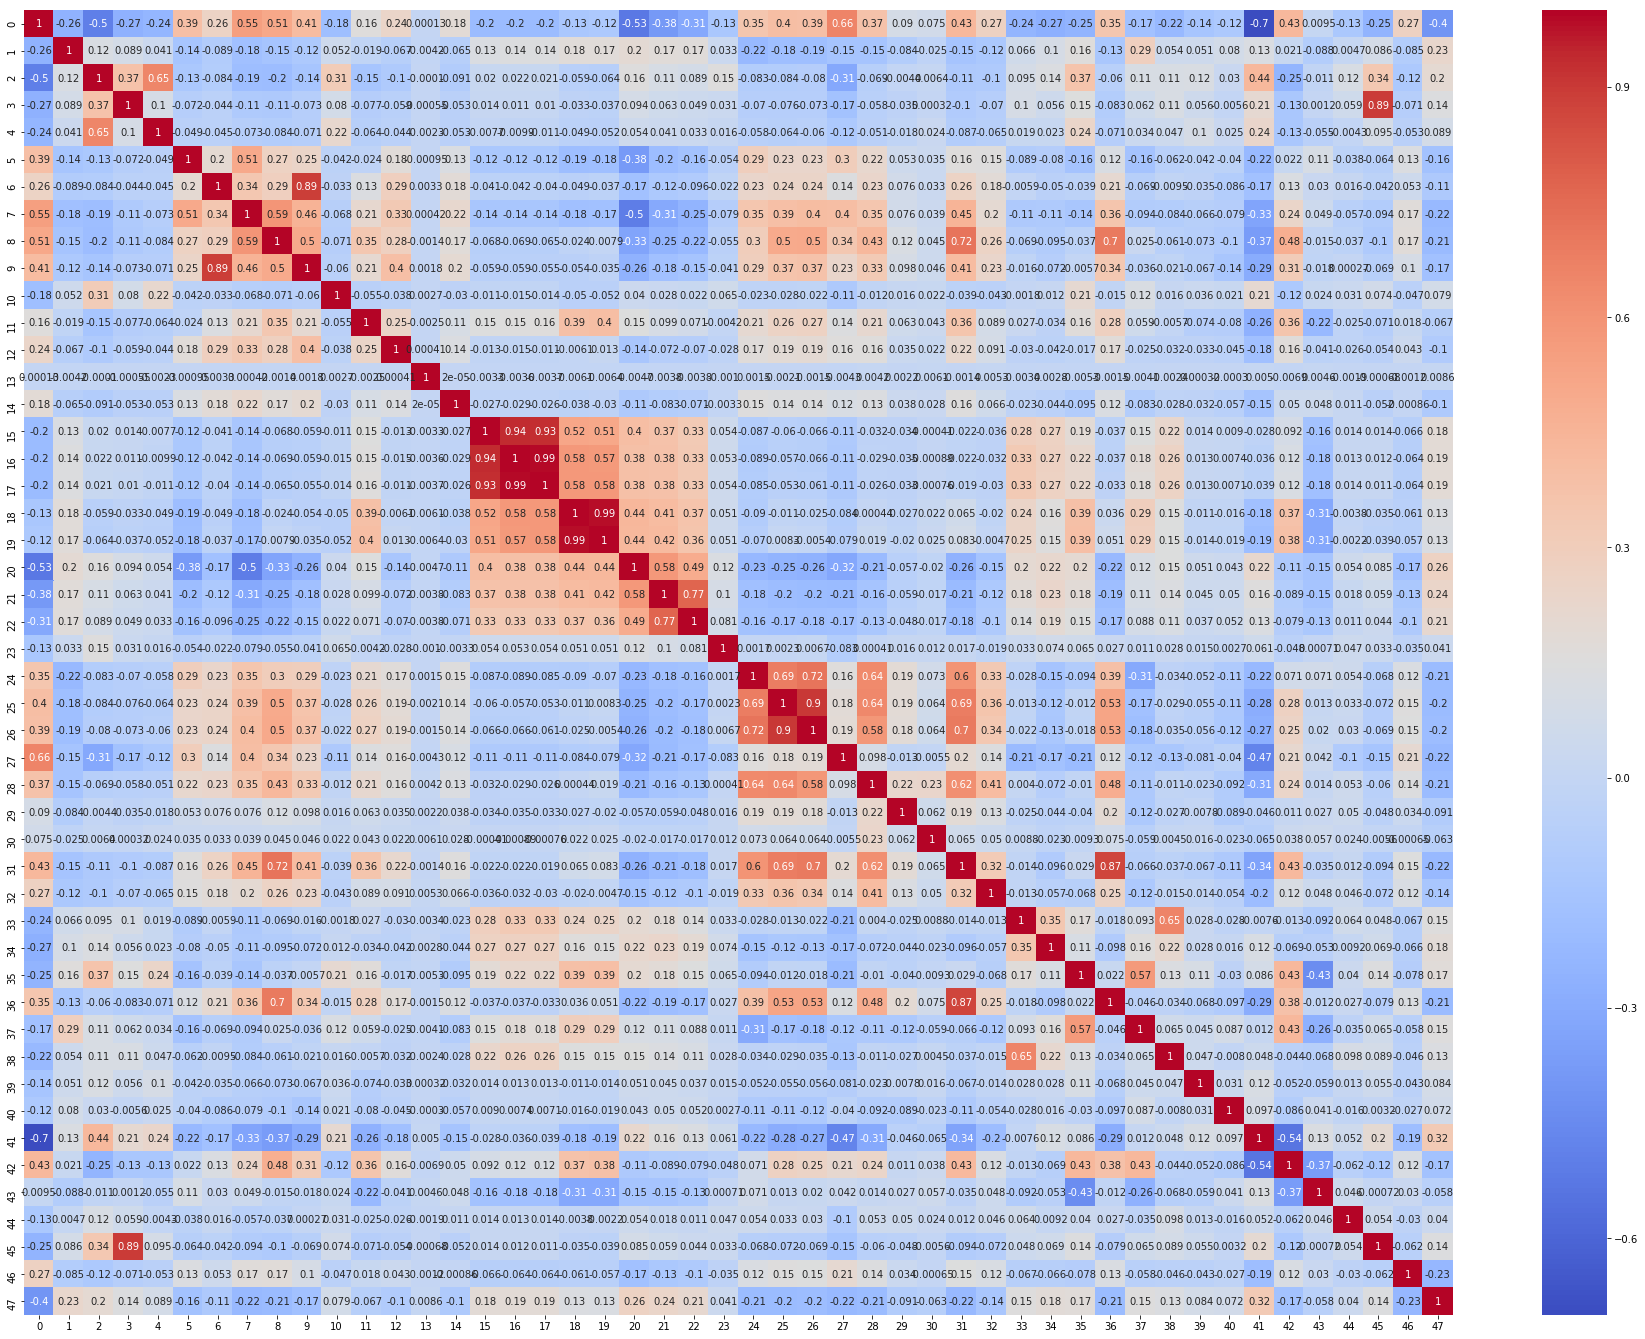

In [20]:
plt.subplots(figsize=(32,24))
sns.heatmap(correlation_inTrainData, cmap='coolwarm', annot=True)

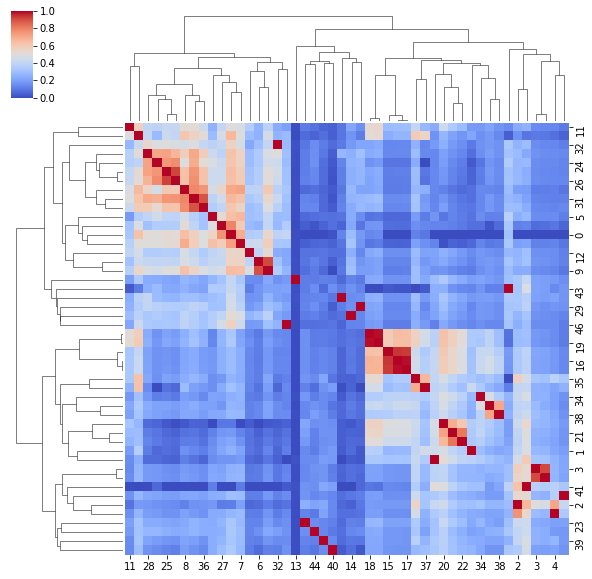

In [21]:
#Plotting the cluster map
sns.clustermap(correlation_inTrainData, cmap='coolwarm', standard_scale = 1)

<h3> Checking whether PCA is possible between various variables </h3>

<h5> Scatter plots between various variables </h5>

In [31]:
#First plotting for the case of mvar21, mvar22, mvar23, mvar24
comparison_dataframe1 = comparison_data[:, [20, 21, 22, 23]]

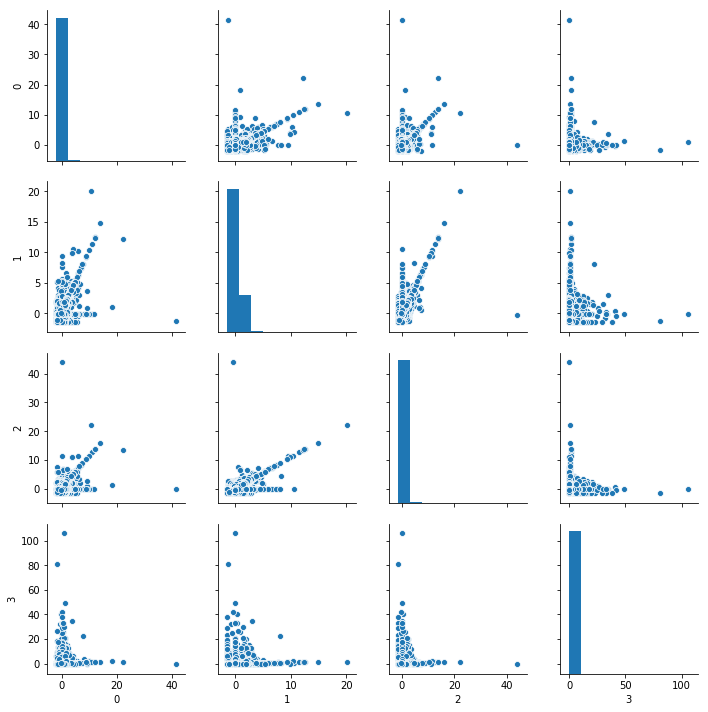

In [32]:
sns.pairplot(pd.DataFrame(comparison_dataframe1))

<h5> In the above diagram:
    0: mvar21
    1: mvar22
    2: mvar23
    3: mvar24

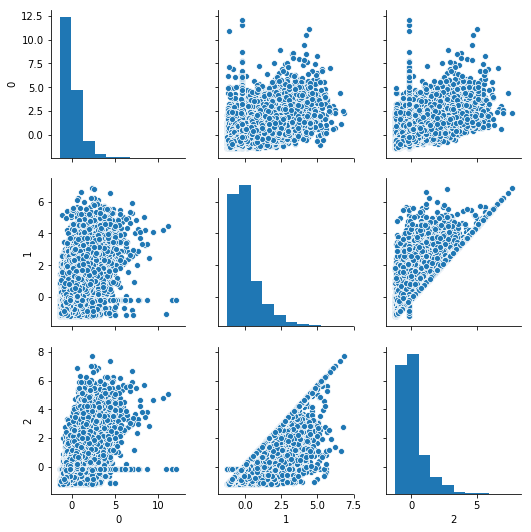

In [62]:
comparison_dataframe2 = comparison_data[:, [24, 25, 26]]
sns.pairplot(pd.DataFrame(comparison_dataframe2))

<h5> In the above we have the mvar25, mvar26, mvar27 </h5>

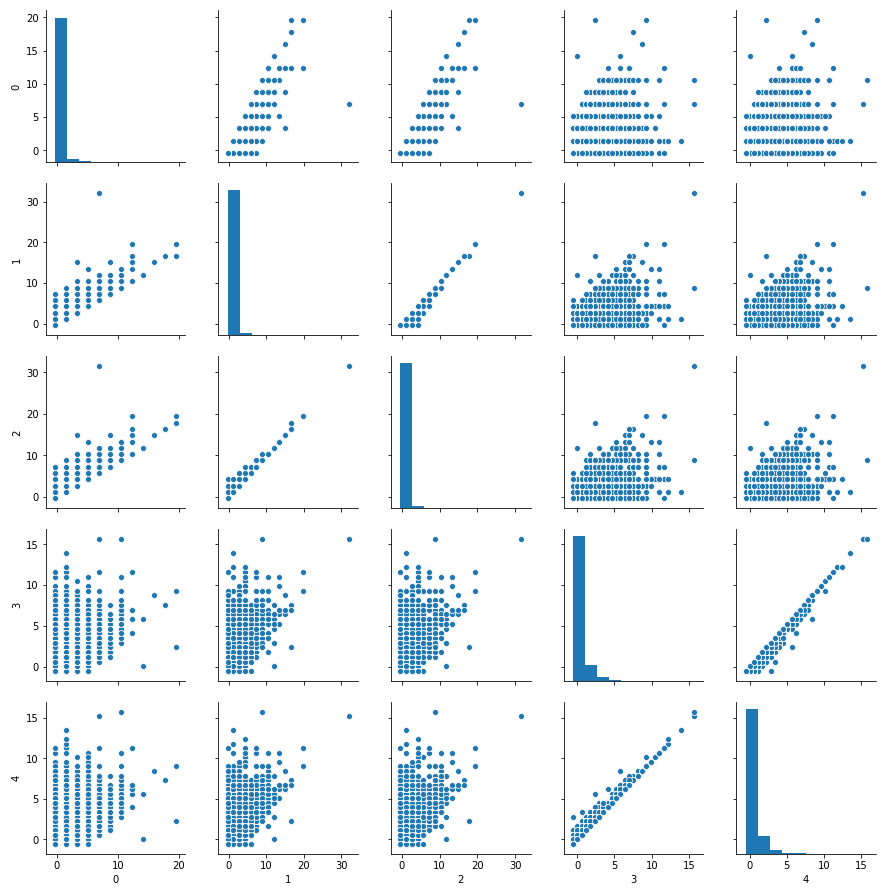

In [59]:
comparison_dataframe3 = comparison_data[:, [15, 16, 17, 18, 19]]
sns.pairplot(pd.DataFrame(comparison_dataframe3))

<h5> In the above we see: mvar16, mvar17, mvar18, mvar19, mvar20 </h5>

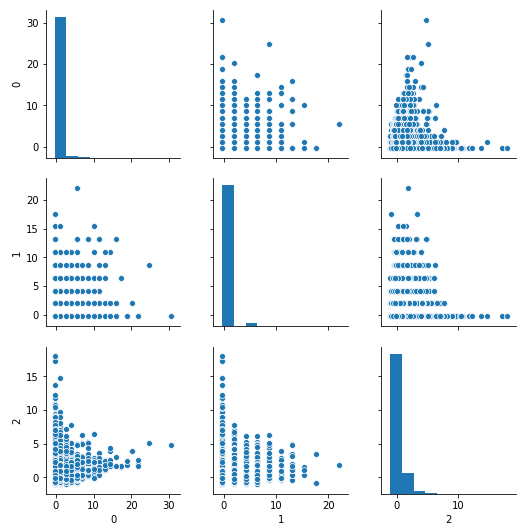

In [60]:
comparison_dataframe4 = comparison_data[:, [33, 34, 35]]
sns.pairplot(pd.DataFrame(comparison_dataframe4))

<h5> In the above we see: mvar 34, mvar 35, mvar 36 </h5>

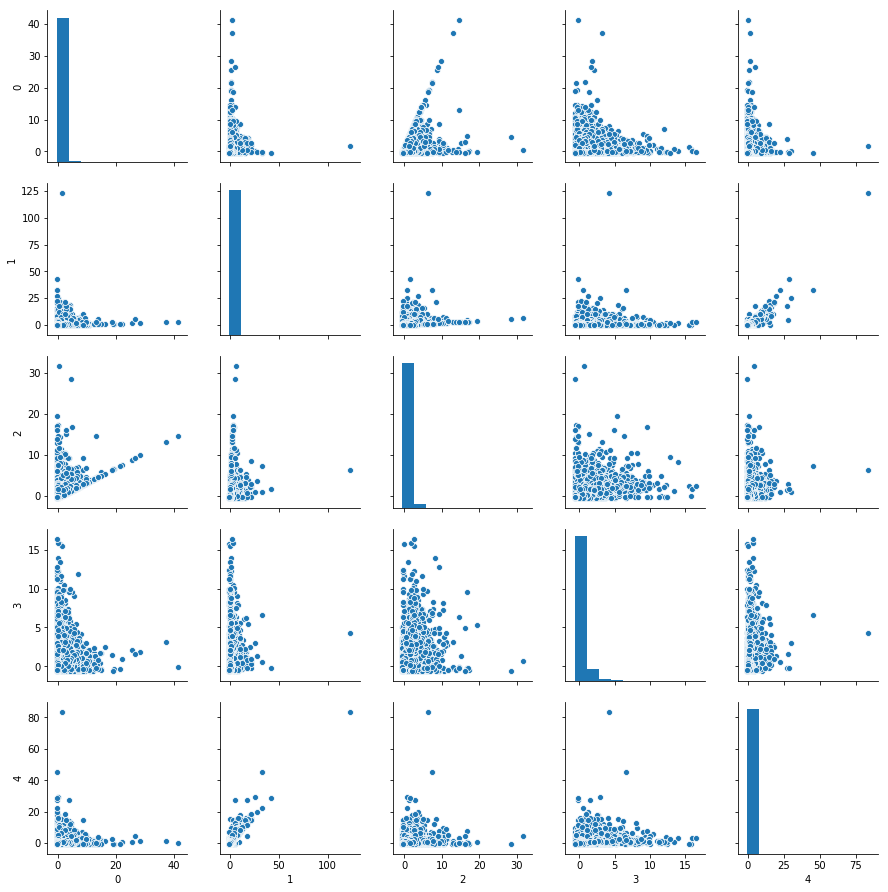

In [61]:
comparison_dataframe5 = comparison_data[:, [5, 6, 7, 8, 9]]
sns.pairplot(pd.DataFrame(comparison_dataframe5))

<h5> This plot is basically between: mvar6, mvar7, mvar8, mvar9 mvar10 </h5>

In [ ]:
#Now here we are going to draw hexplot between various variables

<h4> Removing mvar14 and mvar24 which represented the annual income from X_train and X_test</h4>

In [22]:
X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

In [23]:
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

In [24]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd.fit(X_train[:, [6,9]])

svd_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd_lBoard.fit(X_leaderboard[:, [6,9]])

X_train[:, [6,9]] = svd.transform(X_train[:, [6,9]])
X_test[:, [6,9]] = svd.transform(X_test[:, [6,9]])
X_leaderboard[:, [6,9]] = svd_lBoard.transform(X_leaderboard[:, [6,9]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]

In [25]:
svd2 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2.fit(X_train[:, [13, 14, 15]])

svd2_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2_lBoard.fit(X_leaderboard[:, [13, 14, 15]])

X_train[:, [13, 14, 15]] = svd2.transform(X_train[:, [13, 14, 15]])
X_test[:, [13, 14, 15]] = svd2.transform(X_test[:, [13, 14, 15]])
X_leaderboard[:, [13, 14, 15]] = svd2_lBoard.transform(X_leaderboard[:, [13, 14, 15]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]

In [26]:
svd3 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3.fit(X_train[:, [14, 15]])

svd3_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3_lBoard.fit(X_leaderboard[:, [14, 15]])

X_train[:, [14, 15]] = svd3.transform(X_train[:, [14, 15]])
X_test[:, [14, 15]] = svd3.transform(X_test[:, [14, 15]])
X_leaderboard[:, [14, 15]] = svd3_lBoard.transform(X_leaderboard[:, [14, 15]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]

In [27]:
svd4 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4.fit(X_train[:, [16, 17]])

svd4_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4_lBoard.fit(X_leaderboard[:, [16, 17]])

X_train[:, [16, 17]] = svd4.transform(X_train[:, [16, 17]])
X_test[:, [16, 17]] = svd4.transform(X_test[:, [16, 17]])
X_leaderboard[:, [16, 17]] = svd4_lBoard.transform(X_leaderboard[:, [16, 17]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]

In [28]:
svd5 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5.fit(X_train[:, [17, 18, 19]])

svd5_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5_lBoard.fit(X_leaderboard[:, [17, 18, 19]])

X_train[:, [17, 18, 19]] = svd5.transform(X_train[:, [17, 18, 19]])
X_test[:, [17, 18, 19]] = svd5.transform(X_test[:, [17, 18, 19]])
X_leaderboard[:, [17, 18, 19]] = svd5_lBoard.transform(X_leaderboard[:, [17, 18, 19]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]

In [29]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.290048,0.311423,-0.486601,-0.263285,-0.186988,-0.150867,-0.527733,-0.410544,-0.280746,-0.174138,...,-1.082226,-0.207894,0.023551,0.152566,0.900481,-0.881582,0.490171,-0.160451,-0.232353,-0.737028
1,-1.188651,-0.491874,-0.207604,-0.263285,-0.186988,-0.387570,-0.580941,-0.634504,-0.620256,-0.174138,...,-0.576318,-0.207894,0.023551,0.152566,0.003765,-0.881582,1.247076,-0.160451,-0.232353,-0.737028
2,1.821129,-0.658783,-0.486601,-0.263285,-0.186988,3.222066,0.238299,1.416339,7.359761,-0.174138,...,0.182544,-0.207894,-6.729958,0.152566,-0.892924,1.506709,1.154157,-0.160451,-0.232353,-0.737028
3,0.327065,-0.618813,-0.486601,-0.263285,-0.186988,0.165345,-0.445385,-0.433571,-0.470355,-0.174138,...,-0.323364,-0.207894,0.023551,0.152566,-0.444566,-0.085485,1.228389,-0.160451,-0.232353,1.356801
4,0.099708,-0.669074,-0.336907,0.209075,-0.186988,0.393518,-0.315983,-0.350652,-0.422692,-0.240391,...,-0.576318,-0.207894,1.688152,-2.254820,-0.764822,-0.244704,-0.660173,-0.160451,-0.232353,1.356801


<h3> Now here I trained using an ANN </h3>

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [31]:
classifier = Sequential()

In [32]:
classifier.add(Dense(output_dim = 18, init = 'uniform', activation='relu', input_dim=38))

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=38, units=18, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [33]:
classifier.add(Dense(output_dim = 9, init = 'uniform', activation='relu'))

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [34]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation='sigmoid'))

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [35]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [36]:
classifier.fit(X_train, y_train, nb_epoch=100)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.4375 - acc: 0.7885
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4200 - acc: 0.7997
Epoch 3/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4183 - acc: 0.8019
Epoch 4/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4176 - acc: 0.8020
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4170 - acc: 0.8025
Epoch 6/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4162 - acc: 0.8026
Epoch 7/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.4160 - acc: 0.8033
Epoch 8/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.4158 - acc: 0.8033
Epoch 9/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.4156 - acc: 0.8037
Epoch 10/100
60000/60000 [==============================] - 2s 26us/step - loss: 0.4152 - a

In [37]:
y_pred_test = classifier.predict(X_test)

In [38]:
pd.DataFrame(y_pred_test).describe()

,0
count,2.000000e+04
mean,2.456411e-01
std,2.302510e-01
min,1.055804e-10
25%,4.887161e-02
50%,1.763772e-01
75%,3.847707e-01
max,9.980987e-01


In [39]:
pd.DataFrame(y_pred_test)

,0
0,0.233027
1,0.701634
2,0.520203
3,0.048671
4,0.002519
5,0.001207
6,0.013816
7,0.577752
8,0.001031
9,0.084260


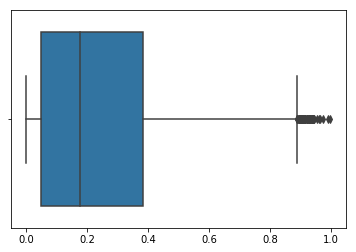

In [40]:
sns.boxplot(y_pred_test)

In [34]:
y_pred_test

array([[0.1590351 ],
       [0.76777285],
       [0.433007  ],
       ...,
       [0.03058714],
       [0.11961992],
       [0.00214253]], dtype=float32)

In [41]:
y_pred_test_copy = y_pred_test
j = 0
for i in y_pred_test_copy:
    if i > 0.5:
        y_pred_test_copy[j] = 1
    else:
        y_pred_test_copy[j] = 0
    j = j+1

In [42]:
y_pred_test_copy

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

0.1945

<h3> Now here I am going to apply logistic regression on our dataset </h3>

In [39]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2 )

In [40]:
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [41]:
y_pred_test = classifier.predict(X_test)

In [42]:
mean_squared_error(y_test, y_pred_test)

0.160912

<h3> Now here I will be using Random Forest Classifier </h3>

In [ ]:
#Actually I will be employing random forest regressor


<h1> Now I am going to start working on the leaderboard dataset </h1>

In [43]:
y_pred_leaderboard = classifier.predict(X_leaderboard)

In [44]:
y_pred_leaderboard

array([0.4, 0. , 0.2, ..., 0.2, 0. , 0. ])

In [48]:
y_pred_leaderboard = y_pred_leaderboard.reshape(y_pred_leaderboard.shape[0], 1)
y_pred_leaderboard.shape

(25000, 1)

In [49]:
lead = pd.read_csv('Leaderboard_dataset.csv')
final_array = lead.iloc[:, 0].values

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
final_array

array([350053, 350054, 350055, ..., 375050, 375051, 375052])

In [51]:
final_array = final_array.reshape(final_array.shape[0], 1)

In [52]:
final_array.shape

(25000, 1)

In [53]:
final_array = np.append(final_array, y_pred_leaderboard, axis=1)

In [54]:
df = pd.DataFrame()
df = pd.DataFrame(final_array)

In [61]:
df

,0,1
0,350053.0,0.4
1,350054.0,0.0
2,350055.0,0.2
3,350056.0,0.6
4,350057.0,0.0
5,350058.0,0.0
6,350059.0,0.2
7,350060.0,0.0
8,350061.0,0.0
9,350062.0,0.0


In [55]:
df2 = df.sort_values([1])

In [56]:
df2

,0,1
24999,375052.0,0.0
8409,358462.0,0.0
8411,358464.0,0.0
8412,358465.0,0.0
17758,367811.0,0.0
8415,358468.0,0.0
17755,367808.0,0.0
17753,367806.0,0.0
8418,358471.0,0.0
8419,358472.0,0.0


In [58]:
j = 0
for i in df2.iloc[:, 1]:
    if i >0.4:
        df2.iloc[j, 1] = 1
    else:
        df2.iloc[j, 1] = 0
    j = j+1

In [59]:
df2

,0,1
24999,375052.0,0.0
8409,358462.0,0.0
8411,358464.0,0.0
8412,358465.0,0.0
17758,367811.0,0.0
8415,358468.0,0.0
17755,367808.0,0.0
17753,367806.0,0.0
8418,358471.0,0.0
8419,358472.0,0.0


In [62]:
df2.to_csv('Be_Professional_IITRoorkee_31.csv', index = False)

In [ ]:
df.